## Lab Report On UltraSound Image Processing

Ultrasonography is a diagnostic imaging technique that is
used for visualizing human body structures including
tendons, muscles, joints, vessels and internal organs. It is
based on ultrasound.
Ultrasound is a cyclic sound pressure wave with a frequency
greater than the upper limit of the human hearing range.
Ultrasound is thus not separated from "normal" (audible)
sound based on differences in physical properties, only the
fact that humans cannot hear it. Ultrasound devices operate
with frequencies from 20 kHz up to several gigahertz.
Ultrasonic is the application of ultrasound. Ultrasound can be
used for imaging, detection, measurement, and cleaning.

An ultrasound signal needs to be processed to obtain imaging information. The steps for forming an image in ultrasound are:

1. Generate an ultrasound mechanical/acoustical wave with the transducer which is usually done by exciting electrically this transducer using a pulser (square electrical pulse of about 900V peak and short duration)
2. Receive and digitize the ultrasound mechanical/acoustical wave by the transducer which is done by receiving the electrical signal from the transducer using a receiver (usually on the same like as the pulser, thus this device is commonly known as a pulser/receiver)
3. The recieved and later digitized signal will have a main frequency that is the central frequency of the transducer material used to generate the ultrasound wave, usually between 1 and 10 MHz
4. The signal is often digitized after limitation and then amplification:

   a. Limitation is performed to eliminate the large voltage pulse sent to the transducer (the received signal is in the order of 2mV while the pulse is 900V)
   
   b. Amplification is performed after limitation and it requires usually about 40dB in gain to boost the signal to values required by most acquisition cards (around 2V)

5. After acquisition we need to compensate for attenuation

6. We finally require to obtain the intensity of each pixel by the envelope of the signal

7. We repeat for all lines

We will open and analyse the signal acquired from a pulser/receiver which was digitized by a 12-bit acquisition card sampling at $125 MHz$ with a $2 Vpp$ maximum voltage. The file provided has one single line coming from this pulser/receiver and it is stored in the file $SingleUSSignalI.dat$. The data in this file was stored by the acquisition card as unsigned integers of 16 bits.

We will first plot the signal with the time scale:

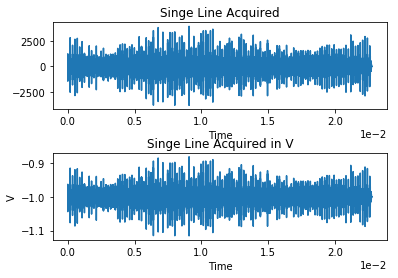

In [29]:
%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert

f = open('E:\Jupyter Notebooks\jupyter notebook\LabRFdata.bin','rb')   
Line = np.fromfile(f,count=-1,dtype=np.int16)
L=len(Line)
f.close() 
#We take step size as 23 Mhz as the when we take 125MHz it cannot give a clear picture also we cannot take below 15 MHZ 
#as it gives error in the further file processing
x=np.arange(0,L/23e6,1/23e6)
plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,Line[:L])
plt.title('Singe Line Acquired')
plt.xlabel('Time')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.subplot(212)
plt.plot(x,LineF[:L])
plt.title('Singe Line Acquired in V')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

We will analyze this signal visually (zoom) to estimate the frequency of the transducer used.
We will then perform a Fourier transform to obtain the central frequency of the transducer.


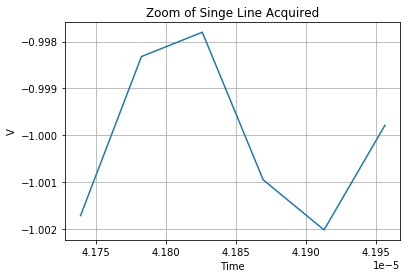

In [17]:
#Taken From the file Ultrasound Assignment 
inx1=np.where(x>0.4170e-4)
inx1=inx1[0]
inx2=np.where(x>0.420e-4)
inx2=inx2[0]
plt.plot(x[inx1[0]:inx2[0]],LineF[inx1[0]:inx2[0]])
plt.title('Zoom of Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('V')
plt.grid()

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Since 1 cycles of the signal are between $0.4180\times 10^{-4}$ and $0.4200\times ^{-4}$ we then have a frequency of $\frac{1}{(0.4200\times 10^{-4}-0.4180\times 10^{-4})/1}=5MHz$

We will now obtain this using DFT. Note: just as we did before, we will take away the dc component!

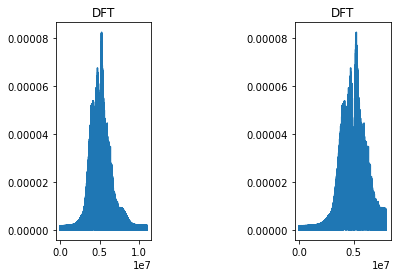

In [18]:
#Eliminating dc
LineF-=np.mean(LineF)

f=np.arange(0,22e6/2,22e6/L)
Y=np.fft.fft(LineF)
Pyy=abs(Y)/L

plt.subplots_adjust( wspace = 1.5 )
plt.subplot(121)
L2=len(Pyy)/2

plt.plot(f[:L2], Pyy[:L2])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#Zooming into just less than 8MHz
inx=np.where(f>8e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

We can see that the frequency of that transducer is $4.78MHz$ and as you can see, using the DFT gave us more precision than estimation.

Assuming that the tissues have attenuated this signal $4Np/m/MHz$ we will compensate for this attenuation and plot the real time-gain-compensated signal. The attenuation is exponential so we can compensate using:

$$ RF_{com}=RF e^{\mu d}\;\;\mu=\alpha f\;\;\;\;\;d=ct\;\;\;c\approx 1450m/s$$


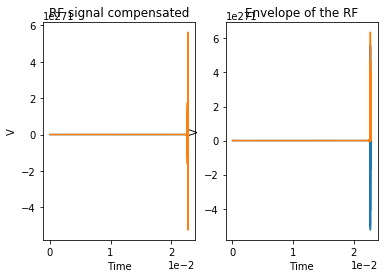

In [19]:
#Same as ultrasound file from class
#Compensating
h=x*1450
#We change the frequency
ffatt=np.exp(4*4.78*h)
LineC=LineF*ffatt
#Plotting
plt.subplot(121)
plt.plot(x,LineF[:L])
plt.title('Before compensation')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(122)
plt.plot(x,LineC[:L])
plt.title('After compensation')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Hilbert Transform
LineE=hilbert(LineC)
LineE=abs(LineE)

plt.subplot(121)
plt.plot(x,LineC[:L])
plt.title('RF signal compensated')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(122)
plt.plot(x,LineE[:L])
plt.title('Envelope of the RF')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

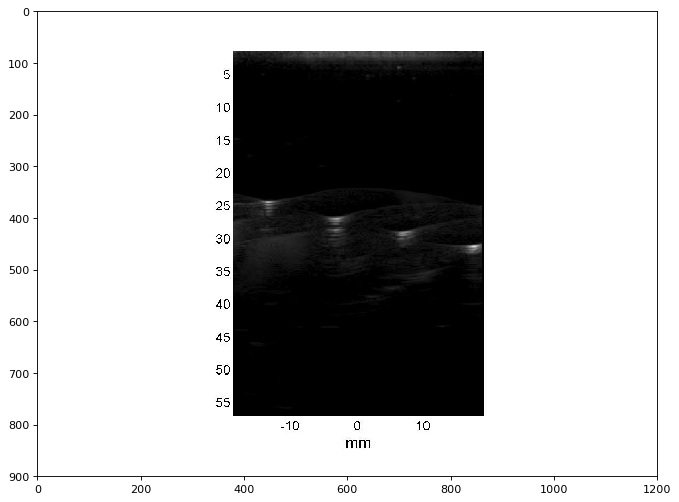

In [24]:
#Now to show image we import the image file and 

from skimage import novice, data, io, exposure
import matplotlib.image as mpimg
import scipy.ndimage as ndimage
img = novice.open('E:\Jupyter Notebooks\jupyter notebook\picture.jpg')
ima= mpimg.imread('E:\Jupyter Notebooks\jupyter notebook\picture.jpg','True') 
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(ima)
plt.show()


In [26]:
#Question No 5
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

#it is possible that in some installations pyDICOM won't be available in which case you will have to install it through pip

# Get file
RefDs = dicom.read_file('E:\Jupyter Notebooks\jupyter notebook\US-MONO2-8-8x-execho.dcm')
# Let's print all the Metadata here
print(RefDs)

(0008, 0000) Group Length                        UL: 342
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TTE', '0001']
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.2.19941105.134500.2.101
(0008, 0020) Study Date                          DA: '1994.11.05'
(0008, 0023) Content Date                        DA: '1994.11.05'
(0008, 0030) Study Time                          TM: '13:45:00'
(0008, 0060) Modality                            CS: 'US'
(0008, 0070) Manufacturer                        LO: 'Acme Products'
(0008, 0090) Referring Physician's Name          PN: 'Anonymized'
(0008, 1030) Study Description                   LO: 'Exercise Echocardiogram'
(0008, 103e) Series Description                  LO: 'Post-Stress'
(0008, 2120) Stage Name                          SH: 'Post-Exercise'
(0008, 2122) Stage Number                        IS: '2'
(0008, 2124) Nu

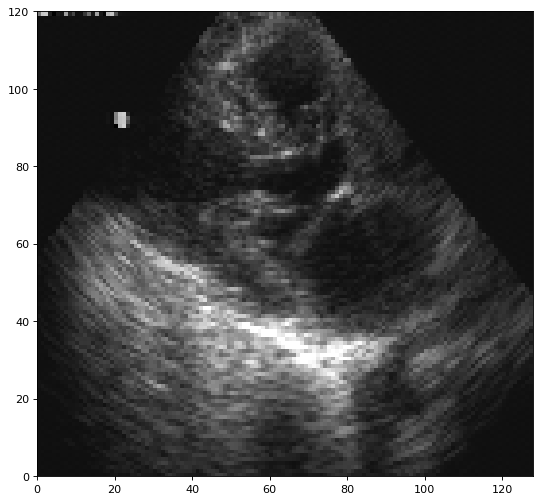

In [28]:
import matplotlib.pyplot as plt
ConstPixelDims = (int(RefDs.NumberofFrames), int(RefDs.Rows), int(RefDs.Columns) )
ArrayDicom = np.zeros(ConstPixelDims,dtype=RefDs.pixel_array.dtype)
#Reading the file 
ds = dicom.read_file('E:\Jupyter Notebooks\jupyter notebook\US-MONO2-8-8x-execho.dcm')
#As this is three dimension image we need x,y,z plane so we add an : 
ArrayDicom[:,:,:]=ds.pixel_array

fig=plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale


plt.pcolormesh(np.flipud(ArrayDicom[7,:,:]))

## Summary

In this example, we rendered an ultrasound image from RF signals acquired with a pulser/receiver.

Test your knowledge:

* Find out and discuss the effect of modifying the filter and explain briefly how a median filter works
* Do you expect that if we process the image using the converted signal into voltage this will change the aspect in your image? why or why not?
* What is the meaning of dB or logarithmic imaging?
* What is the effect of changing the attenuation coefficient? Would it affect the image much if different tissues have different attenuations?
* Why do we use a Hilbert transform to obtain the envelope?\\



References
---------------

* Oppenheim, A. V., and A. S. Willsky. "Signals and Systems." Prentice-Hall, (1997).